<a href="https://colab.research.google.com/github/gh10gh/a/blob/main/A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image loaded successfully.


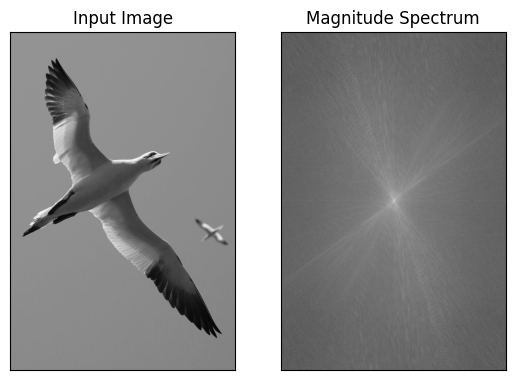

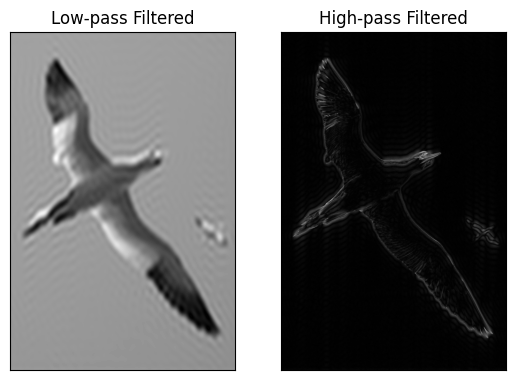

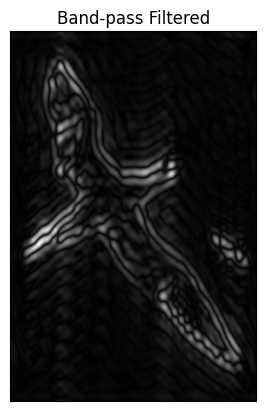

In [3]:
# 1. Implement Filtering in the Frequency Domain
# a. Use the Fast Fourier Transform (FFT) to convert an image from the
# spatial domain to the frequency domain.
# b. Apply a low-pass filter to remove high-frequency components
# (smoothing).
# c. Apply a high-pass filter to enhance edges (sharpening).
# d. Convert the filtered image back to the spatial domain using the
# inverse FFT.
# e. Design a custom frequency domain filter that combines properties of
# both low-pass and high-pass filters (e.g., band-pass filter).
# f. Apply it to an image and analyze the result.
# g. Submit: Your code and the output images for all filters.

import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# Verify if the image file exists
if not os.path.exists('example.jpg'):
    print("Error: Image file 'example.jpg' not found.")
else:
    # Load the image
    img = cv2.imread('example.jpg', 0)  # Load as grayscale

    # Check if the image was loaded successfully
    if img is None:
        print("Error: Image not loaded properly.")
    else:
        print("Image loaded successfully.")

        # Perform FFT
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        # a. Display the original and magnitude spectrum
        plt.subplot(121), plt.imshow(img, cmap='gray')
        plt.title('Input Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
        plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
        plt.savefig("fft.jpg")  # Save the plot as an image
        plt.show()

        # b. Apply low-pass filter (smoothing)
        rows, cols = img.shape
        crow, ccol = rows // 2, cols // 2
        mask = np.zeros((rows, cols), np.uint8)
        mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1
        fshift_lowpass = fshift * mask
        img_lowpass = np.fft.ifft2(np.fft.ifftshift(fshift_lowpass))
        img_lowpass = np.abs(img_lowpass)

        # c. Apply high-pass filter (sharpening)
        mask = np.ones((rows, cols), np.uint8)
        mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0
        fshift_highpass = fshift * mask
        img_highpass = np.fft.ifft2(np.fft.ifftshift(fshift_highpass))
        img_highpass = np.abs(img_highpass)

        # Display the filtered images
        plt.subplot(121), plt.imshow(img_lowpass, cmap='gray')
        plt.title('Low-pass Filtered'), plt.xticks([]), plt.yticks([])
        plt.subplot(122), plt.imshow(img_highpass, cmap='gray')
        plt.title('High-pass Filtered'), plt.xticks([]), plt.yticks([])
        plt.savefig("low_high_pass_filtered_image.jpg")  # Save the plot as an image
        plt.show()

        # e. & f. Design and apply a custom filter (band-pass)
        mask = np.zeros((rows, cols), np.uint8)
        mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1  # Low-pass part
        mask[crow - 10:crow + 10, ccol - 10:ccol + 10] = 0  # High-pass part within low-pass
        fshift_bandpass = fshift * mask
        img_bandpass = np.fft.ifft2(np.fft.ifftshift(fshift_bandpass))
        img_bandpass = np.abs(img_bandpass)

        # Display the band-pass filtered image
        plt.imshow(img_bandpass, cmap='gray')
        plt.title('Band-pass Filtered'), plt.xticks([]), plt.yticks([])
        plt.savefig("band_pass_filtered_image.jpg")  # Save the plot as an image
        plt.show()

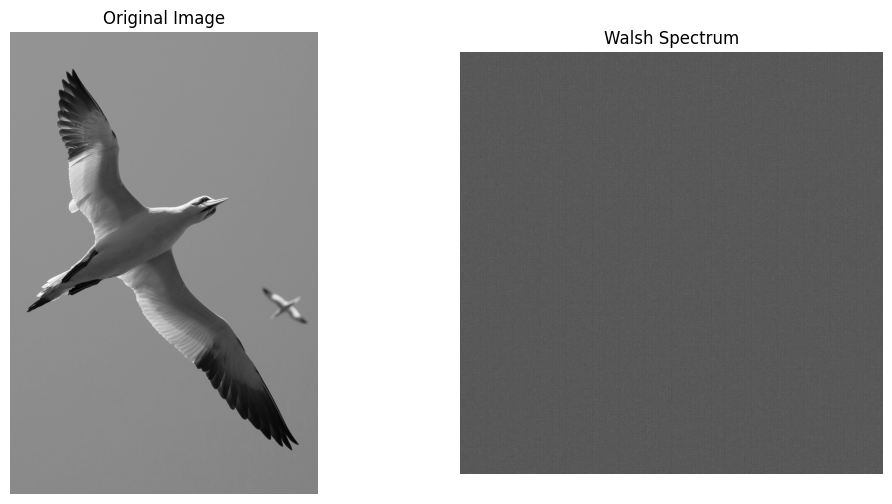

In [3]:
# 2. Walsh and Hadamard transform

# Task 1: Implement Walsh Transform
# ● Apply the Walsh Transform to a given image.
# ● Visualize the Walsh spectrum.
# ● Submit: Your code and the output images.


import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.linalg import hadamard

def walsh_transform(image):
    # Get the nearest power of 2 for the image dimensions
    n = 2**(image.shape[0] - 1).bit_length()

    # Resize the image to the nearest power of 2
    image_resized = cv2.resize(image, (n, n))

    # Calculate the Hadamard matrix (optimized)
    H = hadamard(n, dtype=np.float32)  # Use float32 for faster calculations

    # Perform the Walsh transform (optimized)
    walsh_spectrum = H.dot(image_resized).dot(H)

    return walsh_spectrum

# Load an image
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Walsh transform
walsh_spectrum = walsh_transform(image)

# Display the original image and Walsh spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(walsh_spectrum) + 1), cmap='gray')
plt.title('Walsh Spectrum')
plt.axis('off')

plt.savefig("walsh_transform.jpg")
plt.show()


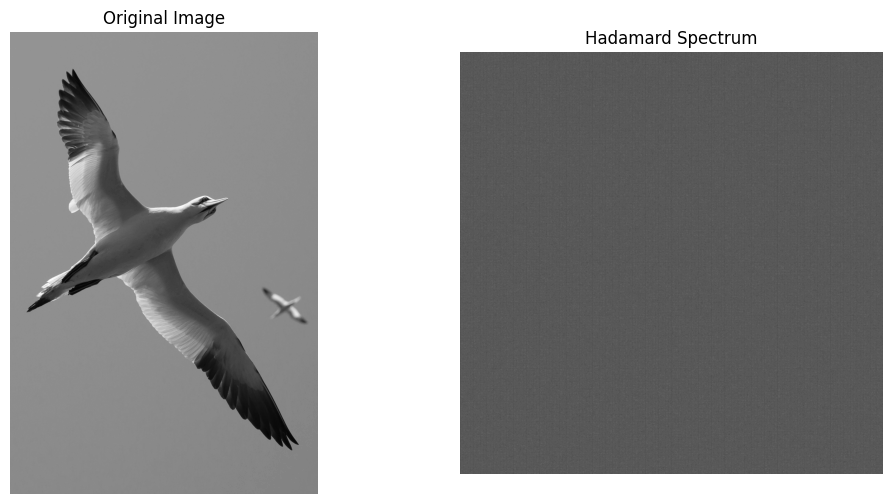

In [4]:
# Task 2: Implement Hadamard Transform
# ● Apply the Hadamard Transform to the same image.
# ● Visualize the Hadamard spectrum.
# ● Submit: Your code and the output images.

import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.linalg import hadamard

def hadamard_transform(image):
    # Get the nearest power of 2 for image dimensions
    n = 2**(image.shape[0] - 1).bit_length()

    # Resize the image to the nearest power of 2
    image_resized = cv2.resize(image, (n, n))

    # Calculate the Hadamard matrix (optimized)
    H = hadamard(n, dtype=np.float32)

    # Perform the Hadamard transform (optimized)
    hadamard_spectrum = H.dot(image_resized).dot(H)

    return hadamard_spectrum

# Load an image (replace 'your_image.jpg' with the actual path)
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Hadamard Transform
hadamard_spectrum = hadamard_transform(image)

# Display the original image and the Hadamard spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')  # Display the original image without resizing
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(hadamard_spectrum) + 1), cmap='gray')
plt.title('Hadamard Spectrum')
plt.axis('off')

plt.savefig("hadamard_transform.jpg")  # Save the output as an image
plt.show()

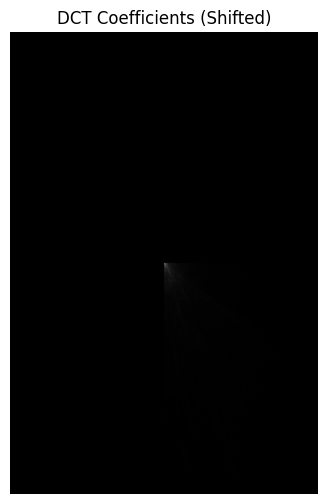

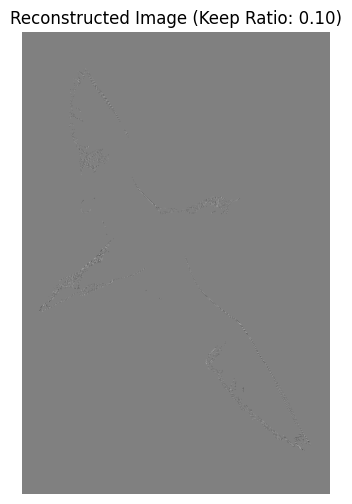

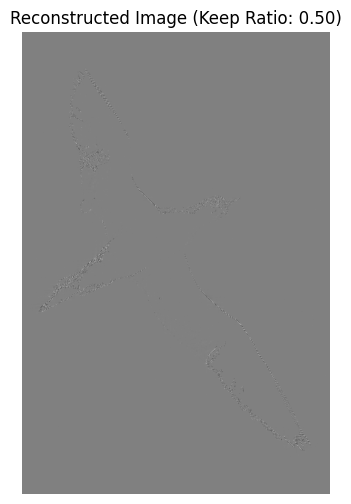

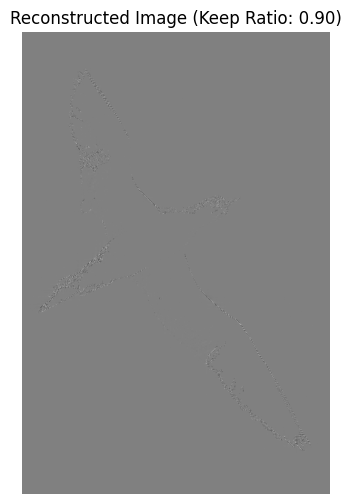

In [5]:

# 3. Discrete Cosine Transform (DCT)
# a. Apply the 2D DCT to an image and visualize the DCT coefficients.
# b. Implement an image compression algorithm based on DCT by
# retaining only a subset of the largest DCT coefficients (e.g., top 10%, 50%, etc.).
# c. Reconstruct the image using the retained coefficients.
# d. Submit: Your code and the images of both the DCT coefficients and
# the reconstructed images for different compression ratios.

import cv2
import numpy as np
from matplotlib import pyplot as plt

# a. Apply 2D DCT and visualize coefficients
def dct_transform(image):
    # Convert image to float32 for DCT
    img_float = np.float32(image) / 255.0

    # Perform DCT
    dct_coeffs = cv2.dct(img_float)

    # Shift zero-frequency component to top-left corner
    dct_coeffs_shifted = np.fft.fftshift(dct_coeffs)

    return dct_coeffs_shifted, dct_coeffs

# b. Image compression (retaining top coefficients)
def compress_dct(dct_coeffs, keep_ratio=0.1):
    # Get the shape of the DCT coefficients
    rows, cols = dct_coeffs.shape

    # Calculate the number of coefficients to keep
    num_coeffs_keep = int(rows * cols * keep_ratio)

    # Sort the DCT coefficients by magnitude and keep the top ones
    sorted_coeffs = np.sort(np.abs(dct_coeffs.reshape(-1)))[::-1]
    threshold = sorted_coeffs[num_coeffs_keep - 1]

    # Create a mask to keep only the top coefficients
    mask = np.abs(dct_coeffs) >= threshold

    # Apply the mask to the DCT coefficients
    compressed_coeffs = dct_coeffs * mask

    return compressed_coeffs

# c. Reconstruct the image
def reconstruct_image(compressed_coeffs):
    # Shift zero-frequency component back to center
    compressed_coeffs_shifted = np.fft.ifftshift(compressed_coeffs)

    # Perform inverse DCT
    reconstructed_img = cv2.idct(compressed_coeffs_shifted)

    # Scale back to 0-255 and convert to uint8
    reconstructed_img = np.uint8(reconstructed_img * 255.0)

    return reconstructed_img

# Load an image (replace 'your_image.jpg' with the actual path)
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# Apply DCT
dct_coeffs_shifted, dct_coeffs = dct_transform(image)

# Visualize DCT coefficients
plt.figure(figsize=(6, 6))
plt.imshow(np.log(np.abs(dct_coeffs_shifted) + 1), cmap='gray')
plt.title('DCT Coefficients (Shifted)')
plt.axis('off')
plt.savefig("dct_coefficients.jpg")  # Save the DCT coefficients image
plt.show()

# Compression ratios to test
keep_ratios = [0.1, 0.5, 0.9]  # Example compression ratios: 10%, 50%, 90%

# Compress and reconstruct for each ratio
for keep_ratio in keep_ratios:
    # Compress the image
    compressed_coeffs = compress_dct(dct_coeffs, keep_ratio)

    # Reconstruct the image
    reconstructed_img = reconstruct_image(compressed_coeffs)

    # Display the reconstructed image
    plt.figure(figsize=(6, 6))
    plt.imshow(reconstructed_img, cmap='gray')
    plt.title(f'Reconstructed Image (Keep Ratio: {keep_ratio:.2f})')
    plt.axis('off')
    plt.savefig(f"reconstructed_image_{keep_ratio:.2f}.jpg")  # Save reconstructed image
    plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.5 MB/s eta 0:00:00


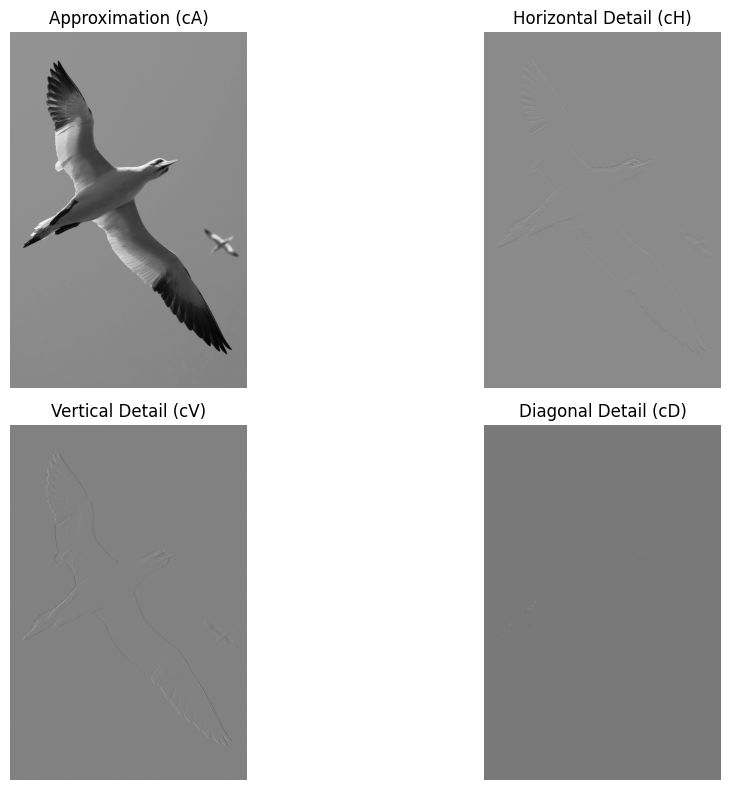

In [6]:
# 4. Discrete Wavelet Transform (DWT)

# Task 1: Implement 2D DWT
# ● Apply the 2D DWT to a given image using a common wavelet (e.g.,
# Haar).
# ● Visualize the wavelet decomposition (approximation and detail
# coefficients).
# ● Submit: Your code and images of the wavelet decomposition.

!pip install PyWavelets # Install if needed
import pywt, cv2, matplotlib.pyplot as plt

def dwt_2d(image):
  coeffs = pywt.dwt2(image, 'haar')
  cA, (cH, cV, cD) = coeffs
  return cA, cH, cV, cD

image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)
cA, cH, cV, cD = dwt_2d(image)

plt.figure(figsize=(12, 8))
for i, (coeff, title) in enumerate([(cA, 'Approximation (cA)'), (cH, 'Horizontal Detail (cH)'),
                                  (cV, 'Vertical Detail (cV)'), (cD, 'Diagonal Detail (cD)')]):
  plt.subplot(2, 2, i + 1)
  plt.imshow(coeff, cmap='gray')
  plt.title(title)
  plt.axis('off')

plt.tight_layout()
plt.savefig("dwt_decomposition.jpg")
plt.show()

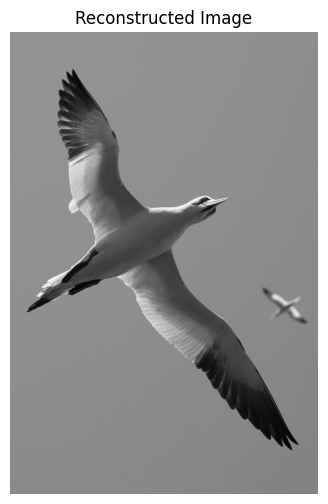

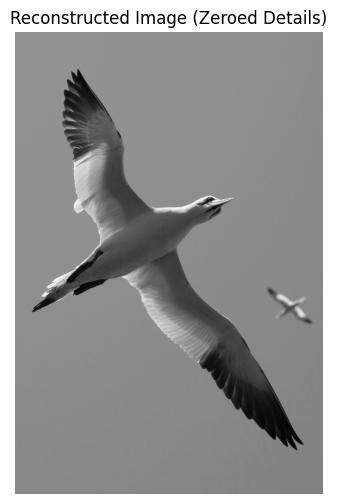

In [7]:
# Task 2: Reconstruct Image using DWT
# ● Reconstruct the original image from its wavelet coefficients.
# ● Experiment with reconstructing the image by selectively retaining
# approximation coefficients at different levels.
# ● Submit: Your code and the reconstructed images.

import pywt
import cv2
import matplotlib.pyplot as plt
import numpy as np

def reconstruct_image(coeffs, wavelet='haar'):
  return pywt.idwt2(coeffs, wavelet)

# Load the image (replace 'example.jpg' with your image path)
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# Perform DWT
coeffs = pywt.dwt2(image, 'haar')
cA, (cH, cV, cD) = coeffs

# Reconstruct the original image
reconstructed_image = reconstruct_image(coeffs)

# Visualize the reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.savefig("reconstructed_dwt_image.jpg")  # Save the reconstructed image
plt.show()

# Experiment with retaining different coefficients
# Zero out detail coefficients
cH_zeroed = np.zeros_like(cH)
cV_zeroed = np.zeros_like(cV)
cD_zeroed = np.zeros_like(cD)

# Reconstruct with approximation and zeroed details
reconstructed_image_zeroed = reconstruct_image((cA, (cH_zeroed, cV_zeroed, cD_zeroed)))

# Visualize the reconstructed image with zeroed details
plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image_zeroed, cmap='gray')
plt.title('Reconstructed Image (Zeroed Details)')
plt.axis('off')
plt.savefig("reconstructed_dwt_image_zeroed_details.jpg")  # Save the image with zeroed details
plt.show()

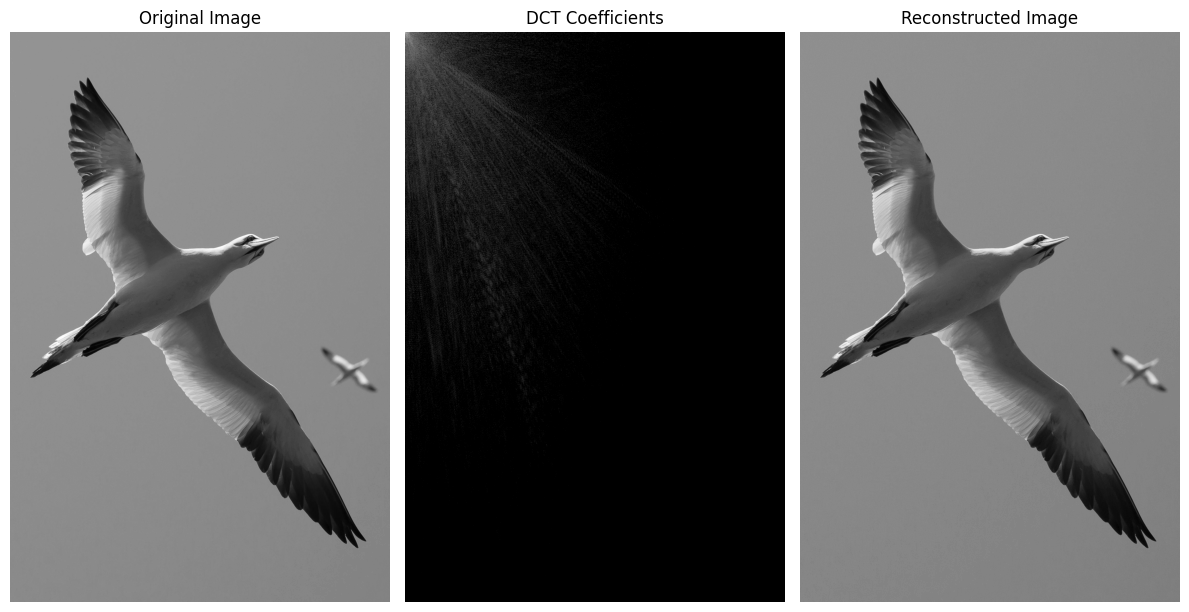

In [8]:
# (Optional): Hybrid Transform
# ● Design a hybrid transform by combining properties of two transforms
# (e.g., DCT and DWT).
# ● Apply this hybrid method to a given image for compression and
# reconstruction.
# ● Submit: Your code, output images, and a brief explanation of the
# hybrid approach.

import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import dct, idct

def hybrid_transform(image, retain_percentage=0.1):
    # 1. Apply DCT
    dct_coeffs = dct(dct(image.T, norm='ortho').T, norm='ortho')

    # 2. Retain largest coefficients
    num_coeffs = int(np.ceil(retain_percentage * dct_coeffs.size))
    threshold = np.partition(np.abs(dct_coeffs.flatten()), -num_coeffs)[-num_coeffs]
    dct_coeffs[np.abs(dct_coeffs) < threshold] = 0

    # 3. Apply DWT on DCT coefficients
    coeffs = pywt.dwt2(dct_coeffs, 'haar')

    # 4. Reconstruct from DWT coefficients
    reconstructed_dct = pywt.idwt2(coeffs, 'haar')

    # 5. Apply inverse DCT
    reconstructed_image = idct(idct(reconstructed_dct.T, norm='ortho').T, norm='ortho')

    return dct_coeffs, reconstructed_image

# Load the image
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# Perform hybrid transform
dct_coeffs, reconstructed_image = hybrid_transform(image, retain_percentage=0.1)

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(np.abs(dct_coeffs) + 1), cmap='gray')
plt.title('DCT Coefficients')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.savefig("hybrid_transform_results.jpg")  # Save the output image
plt.show()